In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.1,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=200,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [4]:
exp.data.shape

(768, 9)

In [5]:
exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


>>> Epoch = 1
Loss = 3.0242199897766113
[2, 3, 2, 7, 2, 2, 4, 3] 0.504198846015
>>> Epoch = 2
Loss = 2.57810378074646
[2, 3, 2, 5, 3, 2, 3, 3] 0.668244331839
>>> Epoch = 3
Loss = 2.3774712085723877
[2, 2, 3, 5, 3, 2, 3, 3] 0.720145748987
>>> Epoch = 4
Loss = 2.2098076343536377
[2, 3, 3, 5, 3, 2, 2, 3] 0.763894717453
>>> Epoch = 5
Loss = 2.020040273666382
[2, 3, 2, 2, 3, 2, 3, 3] 0.759190484303
>>> Epoch = 6
Loss = 2.0121476650238037
[2, 3, 2, 5, 3, 2, 3, 3] 0.778505571781
>>> Epoch = 7
Loss = 1.9216214418411255
[2, 3, 2, 5, 3, 2, 2, 3] 0.783869653297
>>> Epoch = 8
Loss = 1.9027107954025269
[2, 3, 2, 2, 3, 2, 2, 3] 0.771881086132
>>> Epoch = 9
Loss = 1.8982371091842651
[2, 2, 2, 3, 3, 2, 2, 3] 0.781098327756
>>> Epoch = 10
Loss = 1.9308266639709473
[2, 3, 2, 2, 3, 2, 2, 3] 0.769358701725
>>> Epoch = 11
Loss = 1.8112393617630005
[2, 2, 2, 5, 3, 2, 3, 2] 0.786012180487
>>> Epoch = 12
Loss = 1.7955888509750366
[2, 3, 2, 5, 3, 2, 3, 2] 0.790137707941
>>> Epoch = 13
Loss = 1.6211724281311035

>>> Epoch = 103
Loss = 1.5279031991958618
[2, 2, 2, 3, 3, 2, 3, 2] 0.830767414727
>>> Epoch = 104
Loss = 1.4998667240142822
[2, 2, 2, 3, 3, 2, 3, 2] 0.8311184265
>>> Epoch = 105
Loss = 1.4718769788742065
[2, 2, 2, 3, 3, 2, 3, 2] 0.830144306537
>>> Epoch = 106
Loss = 1.6149848699569702
[2, 2, 2, 3, 3, 2, 3, 2] 0.833703966839
>>> Epoch = 107
Loss = 1.719438076019287
[2, 2, 2, 3, 3, 2, 3, 2] 0.83379266969
>>> Epoch = 108
Loss = 1.6685019731521606
[2, 2, 2, 3, 3, 2, 3, 2] 0.831764402401
>>> Epoch = 109
Loss = 1.51752507686615
[2, 2, 2, 3, 3, 2, 2, 2] 0.832112701396
>>> Epoch = 110
Loss = 1.6696878671646118
[2, 2, 2, 3, 3, 2, 3, 2] 0.83209353853
>>> Epoch = 111
Loss = 1.4958195686340332
[2, 2, 2, 3, 3, 2, 3, 2] 0.830094782785
>>> Epoch = 112
Loss = 1.5193294286727905
[2, 2, 2, 3, 3, 2, 3, 2] 0.832100595951
>>> Epoch = 113
Loss = 1.6888307332992554
[2, 2, 2, 3, 3, 2, 3, 2] 0.83161523561
>>> Epoch = 114
Loss = 1.5347586870193481
[2, 2, 2, 3, 3, 2, 3, 2] 0.830497855135
>>> Epoch = 115
Loss = 1

>>> Epoch = 3
Loss = 3.0164880752563477
[2, 2, 3, 2, 3, 2, 3, 2] 0.702106409785
>>> Epoch = 4
Loss = 3.0011372566223145
[2, 2, 3, 2, 3, 2, 3, 2] 0.767956179829
>>> Epoch = 5
Loss = 2.8303050994873047
[3, 2, 3, 2, 3, 2, 3, 2] 0.764994288779
>>> Epoch = 6
Loss = 2.692868947982788
[3, 2, 3, 2, 3, 2, 3, 2] 0.78412648736
>>> Epoch = 7
Loss = 2.6937129497528076
[2, 2, 4, 2, 3, 2, 3, 2] 0.793653094919
>>> Epoch = 8
Loss = 2.596851110458374
[2, 2, 4, 2, 3, 2, 3, 3] 0.761081071469
>>> Epoch = 9
Loss = 2.48531174659729
[2, 2, 4, 2, 3, 2, 3, 3] 0.796103623451
>>> Epoch = 10
Loss = 2.562562942504883
[2, 2, 3, 2, 3, 2, 3, 3] 0.763192901187
>>> Epoch = 11
Loss = 2.4302167892456055
[2, 2, 3, 2, 3, 2, 3, 3] 0.762256235862
>>> Epoch = 12
Loss = 2.387216091156006
[3, 2, 3, 2, 3, 2, 3, 3] 0.75521163035
>>> Epoch = 13
Loss = 2.23122239112854
[3, 2, 3, 2, 3, 2, 3, 3] 0.769736567058
>>> Epoch = 14
Loss = 2.468918561935425
[3, 2, 3, 2, 3, 2, 3, 2] 0.769157711178
>>> Epoch = 15
Loss = 2.27763295173645
[3, 2, 

>>> Epoch = 105
Loss = 1.9383445978164673
[3, 2, 3, 3, 3, 2, 2, 2] 0.822077647404
>>> Epoch = 106
Loss = 2.1162800788879395
[3, 2, 3, 3, 3, 2, 2, 2] 0.820905407144
>>> Epoch = 107
Loss = 2.1738312244415283
[3, 2, 3, 3, 3, 2, 2, 2] 0.821037018682
>>> Epoch = 108
Loss = 2.245612144470215
[3, 2, 3, 3, 3, 2, 2, 2] 0.821586534783
>>> Epoch = 109
Loss = 2.105973958969116
[3, 2, 3, 3, 3, 2, 2, 2] 0.822140338313
>>> Epoch = 110
Loss = 2.151066780090332
[3, 2, 3, 3, 3, 2, 2, 2] 0.821962590419
>>> Epoch = 111
Loss = 1.9736237525939941
[3, 2, 3, 3, 3, 2, 2, 2] 0.821543054126
>>> Epoch = 112
Loss = 2.002060651779175
[3, 2, 3, 3, 3, 2, 2, 2] 0.821035634833
>>> Epoch = 113
Loss = 2.1681880950927734
[3, 2, 3, 3, 3, 2, 2, 2] 0.820690350435
>>> Epoch = 114
Loss = 2.038900852203369
[3, 2, 3, 3, 3, 2, 2, 2] 0.820692697931
>>> Epoch = 115
Loss = 1.9154659509658813
[3, 2, 3, 2, 3, 2, 2, 2] 0.819782555545
>>> Epoch = 116
Loss = 2.1421947479248047
[3, 2, 3, 2, 3, 2, 2, 2] 0.820225664085
>>> Epoch = 117
Loss 

>>> Epoch = 6
Loss = 3.076529026031494
[4, 5, 2, 4, 3, 3, 2, 3] 0.579642034226
>>> Epoch = 7
Loss = 3.0323519706726074
[3, 2, 2, 4, 3, 2, 2, 3] 0.622395321058
>>> Epoch = 8
Loss = 2.928734540939331
[4, 2, 2, 4, 3, 2, 2, 3] 0.624248967081
>>> Epoch = 9
Loss = 2.791079044342041
[4, 2, 2, 3, 3, 2, 2, 4] 0.62856567081
>>> Epoch = 10
Loss = 2.9109508991241455
[3, 2, 2, 3, 3, 2, 2, 3] 0.652488347192
>>> Epoch = 11
Loss = 2.7435317039489746
[4, 2, 2, 3, 3, 2, 2, 4] 0.654528471508
>>> Epoch = 12
Loss = 2.7315661907196045
[3, 2, 2, 3, 3, 2, 2, 2] 0.657638686989
>>> Epoch = 13
Loss = 2.508052349090576
[3, 2, 2, 3, 3, 2, 14, 2] 0.676304698942
>>> Epoch = 14
Loss = 2.7904350757598877
[3, 2, 2, 3, 3, 2, 3, 2] 0.679947293532
>>> Epoch = 15
Loss = 2.59745717048645
[3, 2, 2, 3, 3, 2, 3, 2] 0.684483367845
>>> Epoch = 16
Loss = 2.7065513134002686
[3, 2, 2, 3, 3, 2, 3, 2] 0.685915241405
>>> Epoch = 17
Loss = 2.513199806213379
[3, 2, 2, 3, 3, 2, 3, 2] 0.687822924019
>>> Epoch = 18
Loss = 2.589670896530151

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


>>> Epoch = 102
Loss = 2.2705800533294678
[3, 2, 2, 3, 3, 8, 2, 3] 0.703134756174
>>> Epoch = 103
Loss = 2.205441951751709
[3, 2, 2, 3, 3, 8, 2, 3] 0.702622029004
>>> Epoch = 104
Loss = 2.2425129413604736
[3, 2, 2, 3, 3, 8, 2, 3] 0.704376775247
>>> Epoch = 105
Loss = 2.11902117729187
[3, 2, 2, 3, 3, 8, 2, 3] 0.70373513337
>>> Epoch = 106
Loss = 2.3763344287872314
[3, 2, 2, 3, 3, 8, 2, 3] 0.703375446658
>>> Epoch = 107
Loss = 2.348829507827759
[3, 2, 2, 3, 3, 8, 2, 3] 0.703587548826
>>> Epoch = 108
Loss = 2.526235580444336
[3, 2, 2, 3, 3, 8, 2, 3] 0.705036587103
>>> Epoch = 109
Loss = 2.3560848236083984
[3, 2, 2, 3, 3, 8, 2, 3] 0.705574576525
>>> Epoch = 110
Loss = 2.3879234790802
[3, 2, 2, 3, 3, 8, 2, 3] 0.704749170735
>>> Epoch = 111
Loss = 2.257068395614624
[3, 2, 2, 3, 3, 8, 2, 3] 0.703316737137
>>> Epoch = 112
Loss = 2.2258853912353516
[3, 2, 2, 3, 3, 8, 2, 3] 0.703040733491
>>> Epoch = 113
Loss = 2.3362298011779785
[3, 2, 2, 3, 3, 8, 2, 3] 0.704263373122
>>> Epoch = 114
Loss = 2.2

In [6]:
result = exp.get_result()

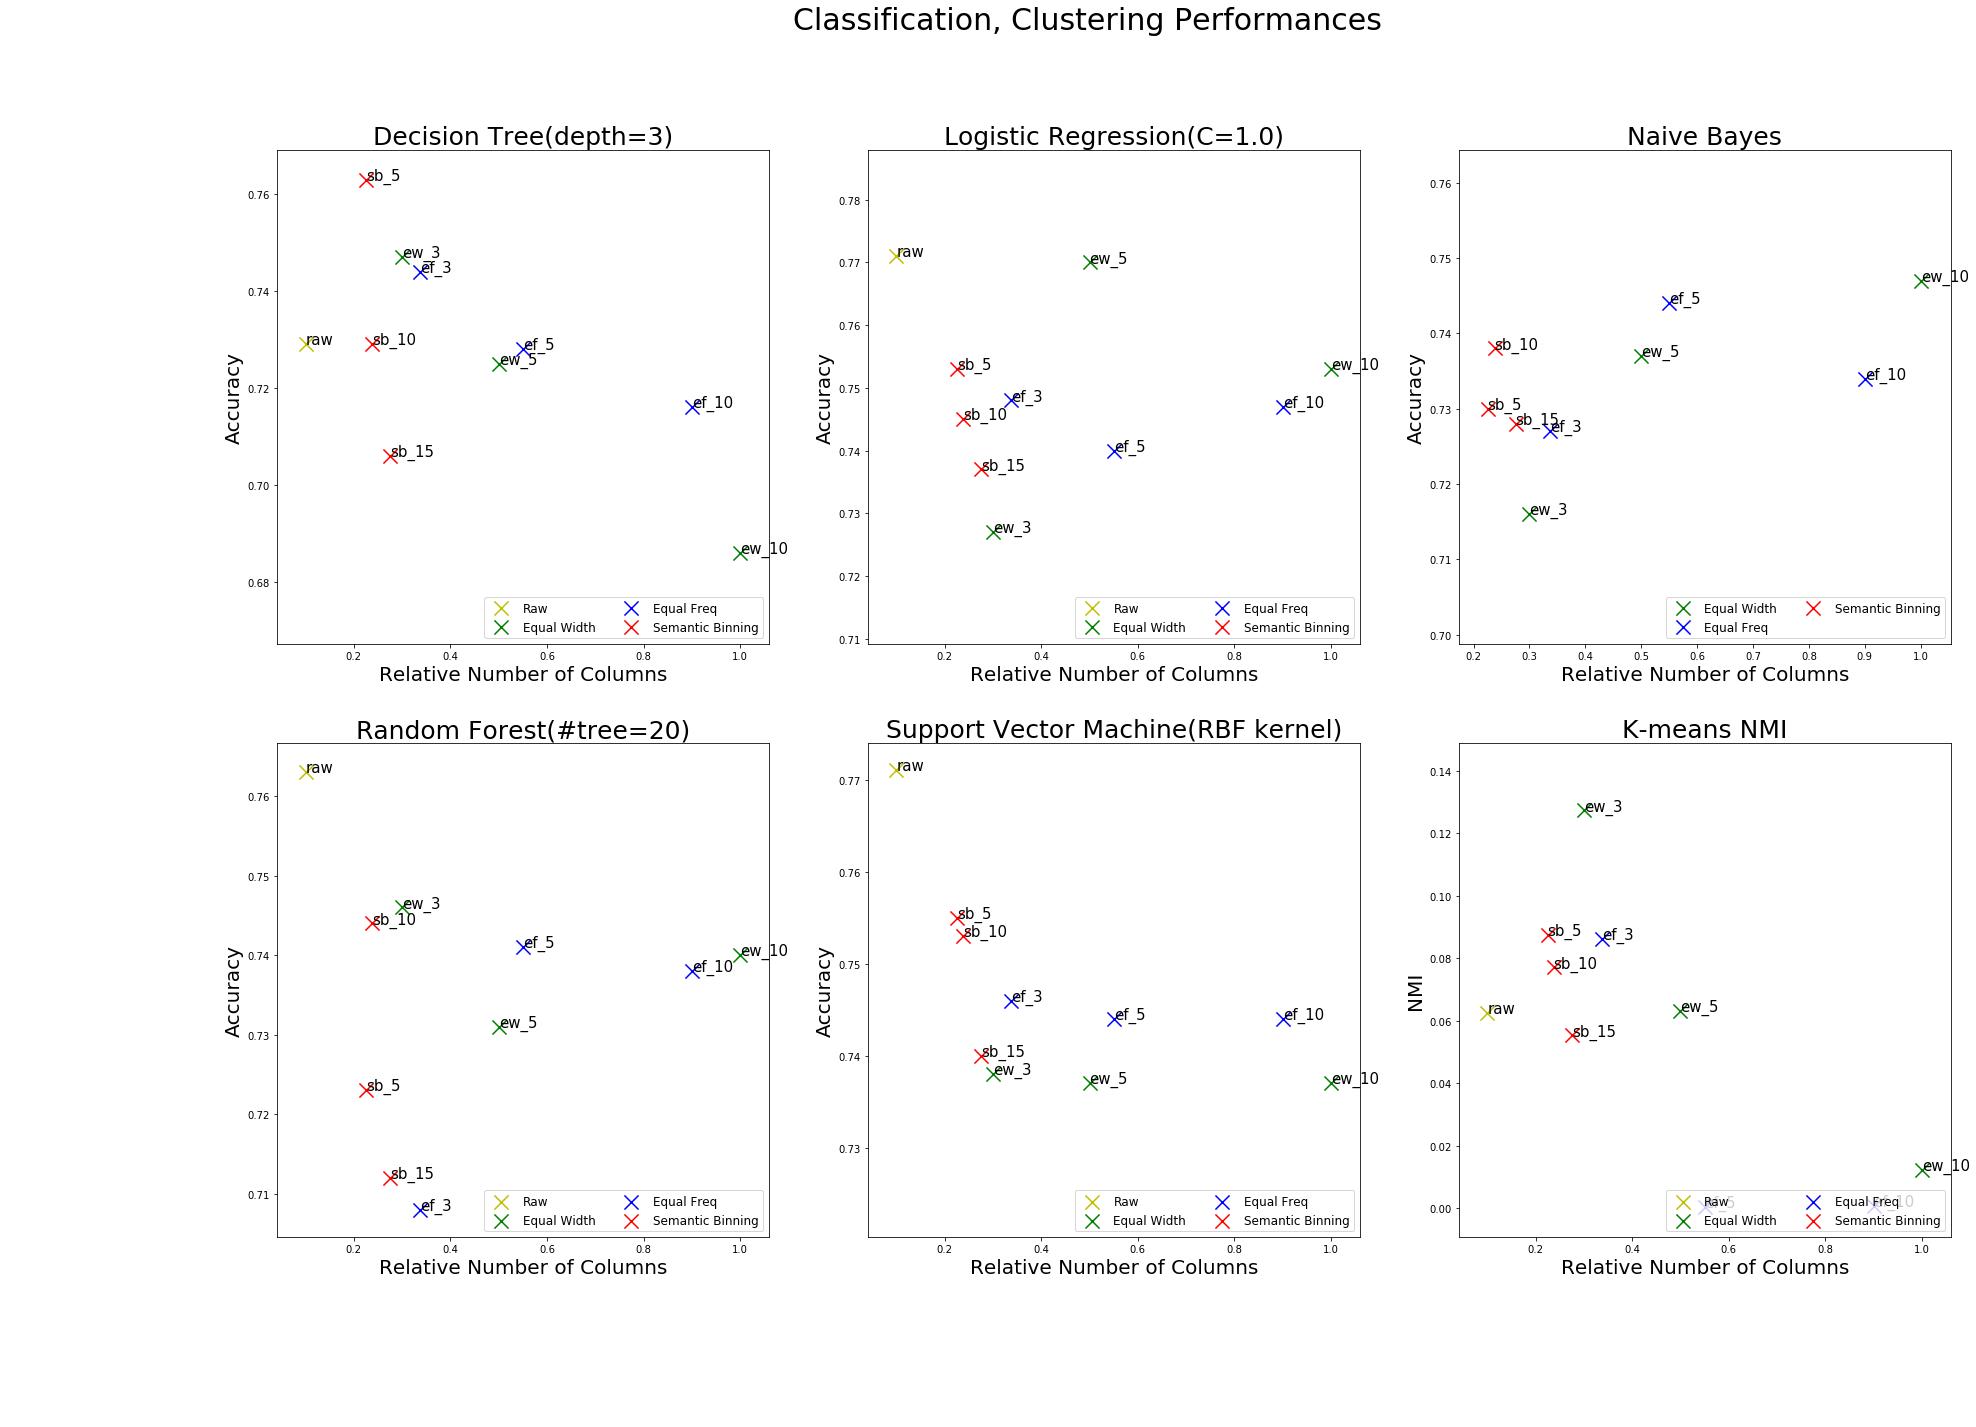

In [7]:
exp.plot_model_comparison_chart(result)

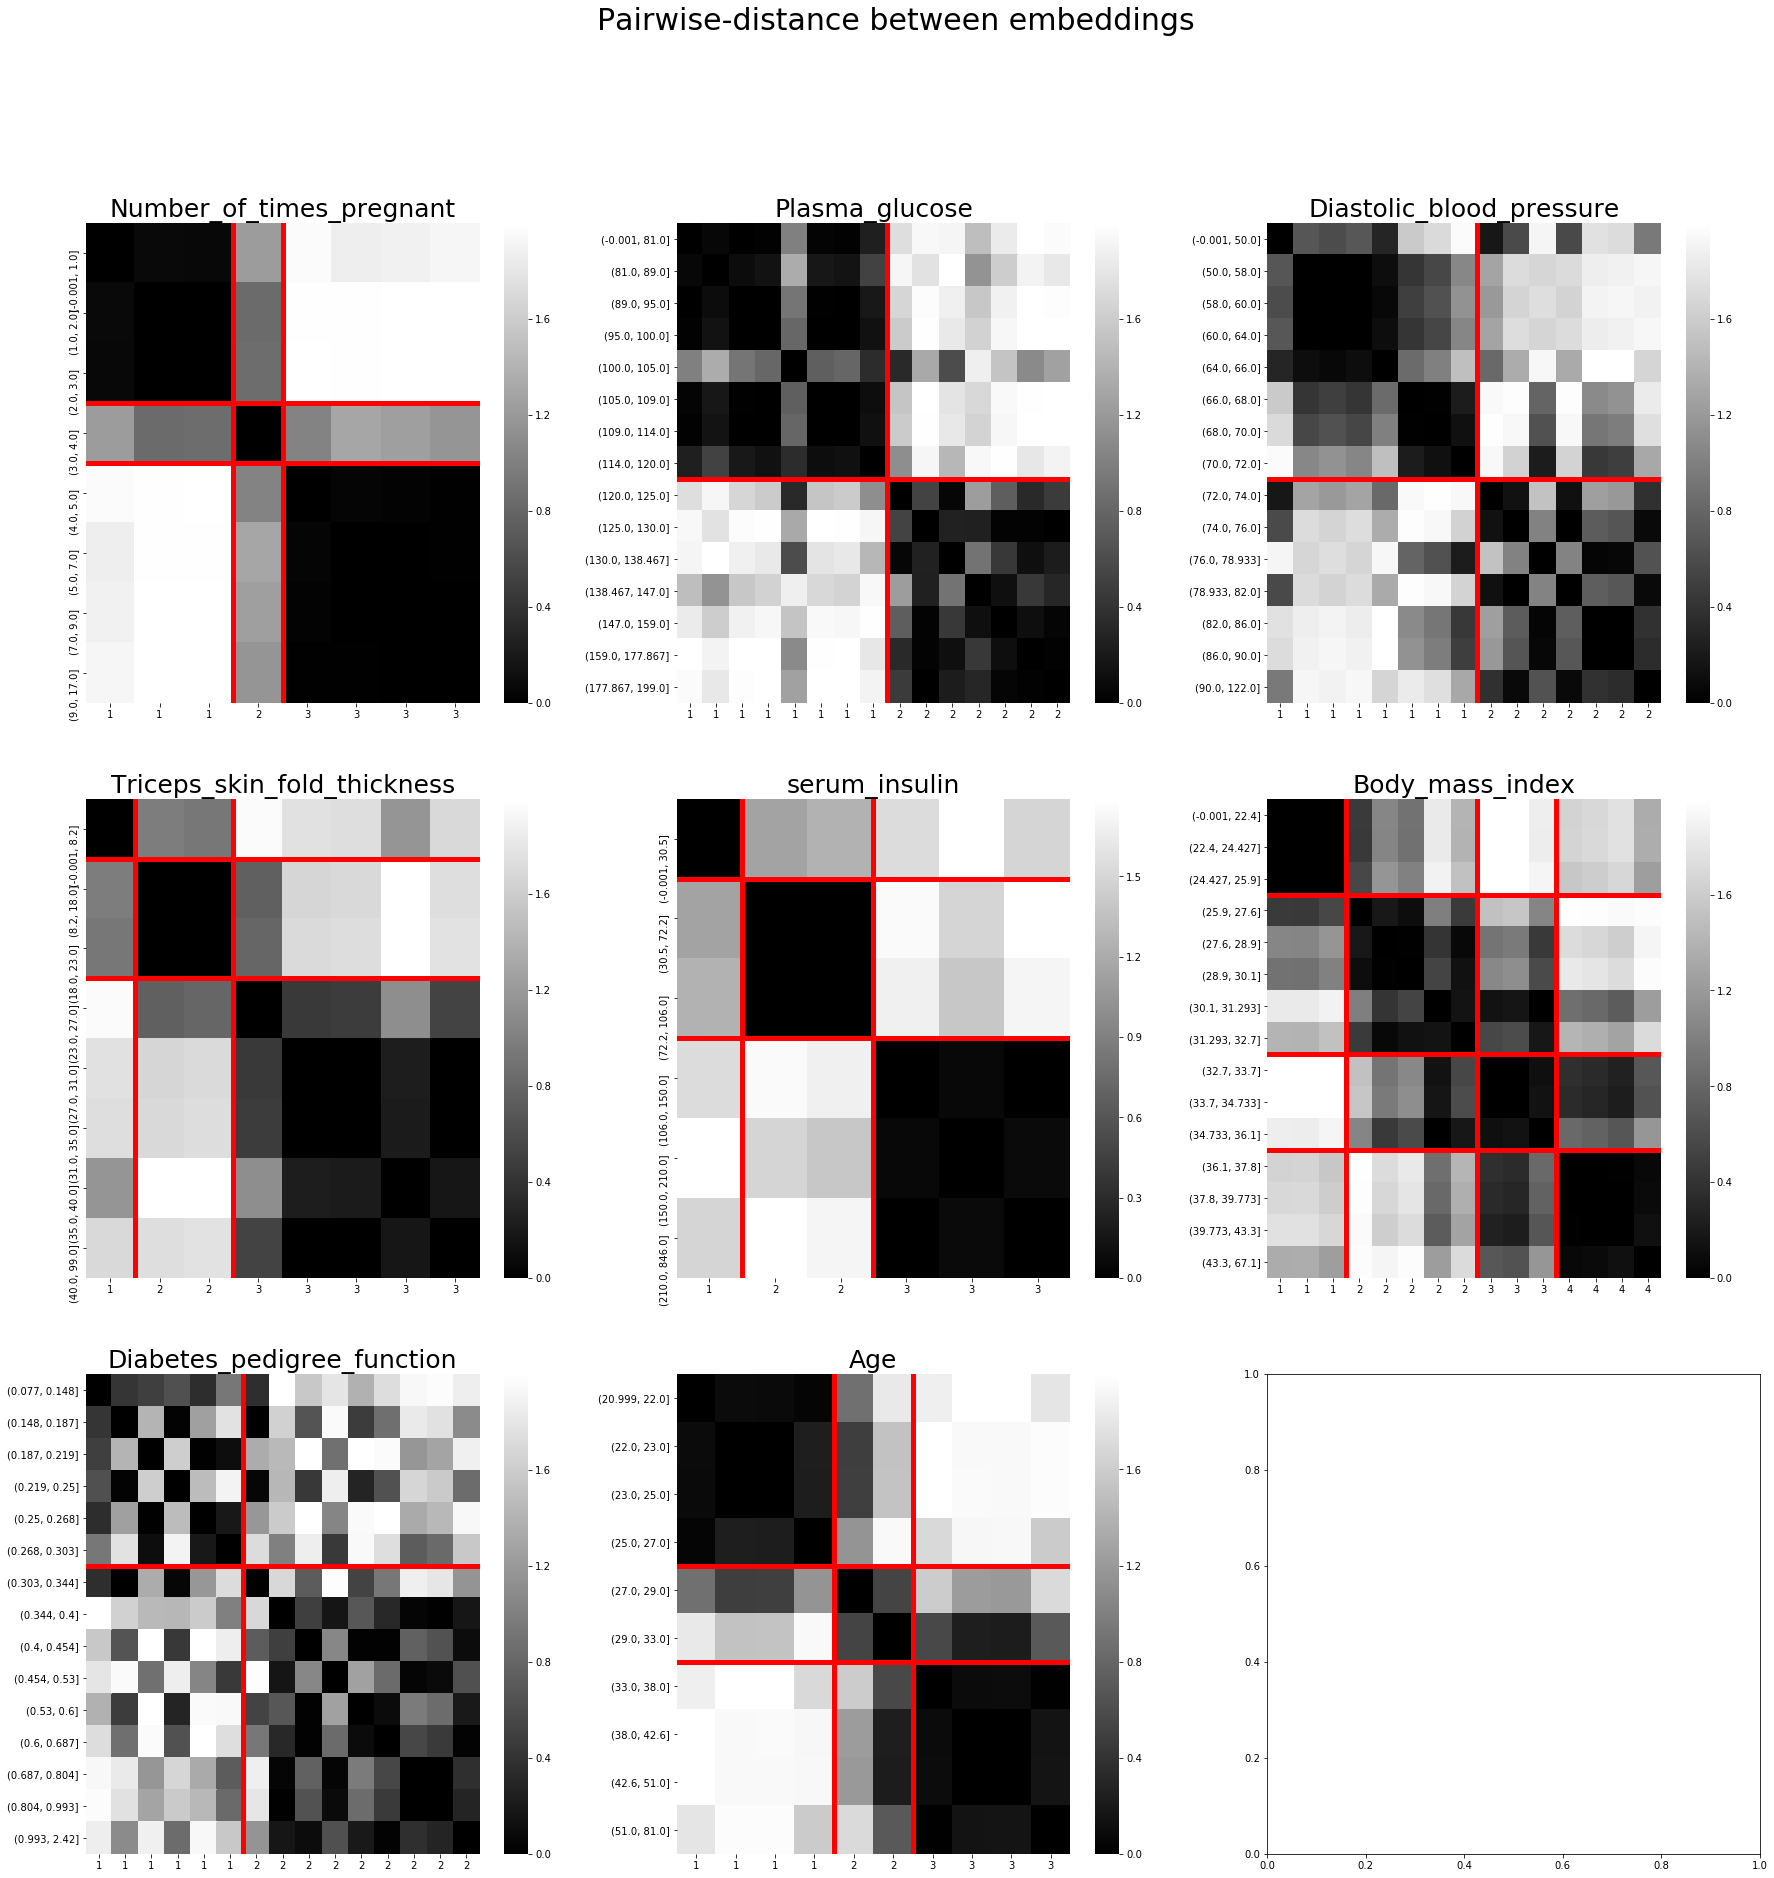

In [8]:
exp.plot_pairwise_distance_matrices()